# Flight Consumer
In this file we are going to read the information sent by the producer, and will will transform it in a certain way that we can plot the number of flights sent with a certain timestamp. The graph displays 7 different lines, one for each day of the week, and all of them are plotted at the same time. In order to make the graph visible we are going to display the data collected in the last 20 seconds.

<IPython.core.display.Javascript object>


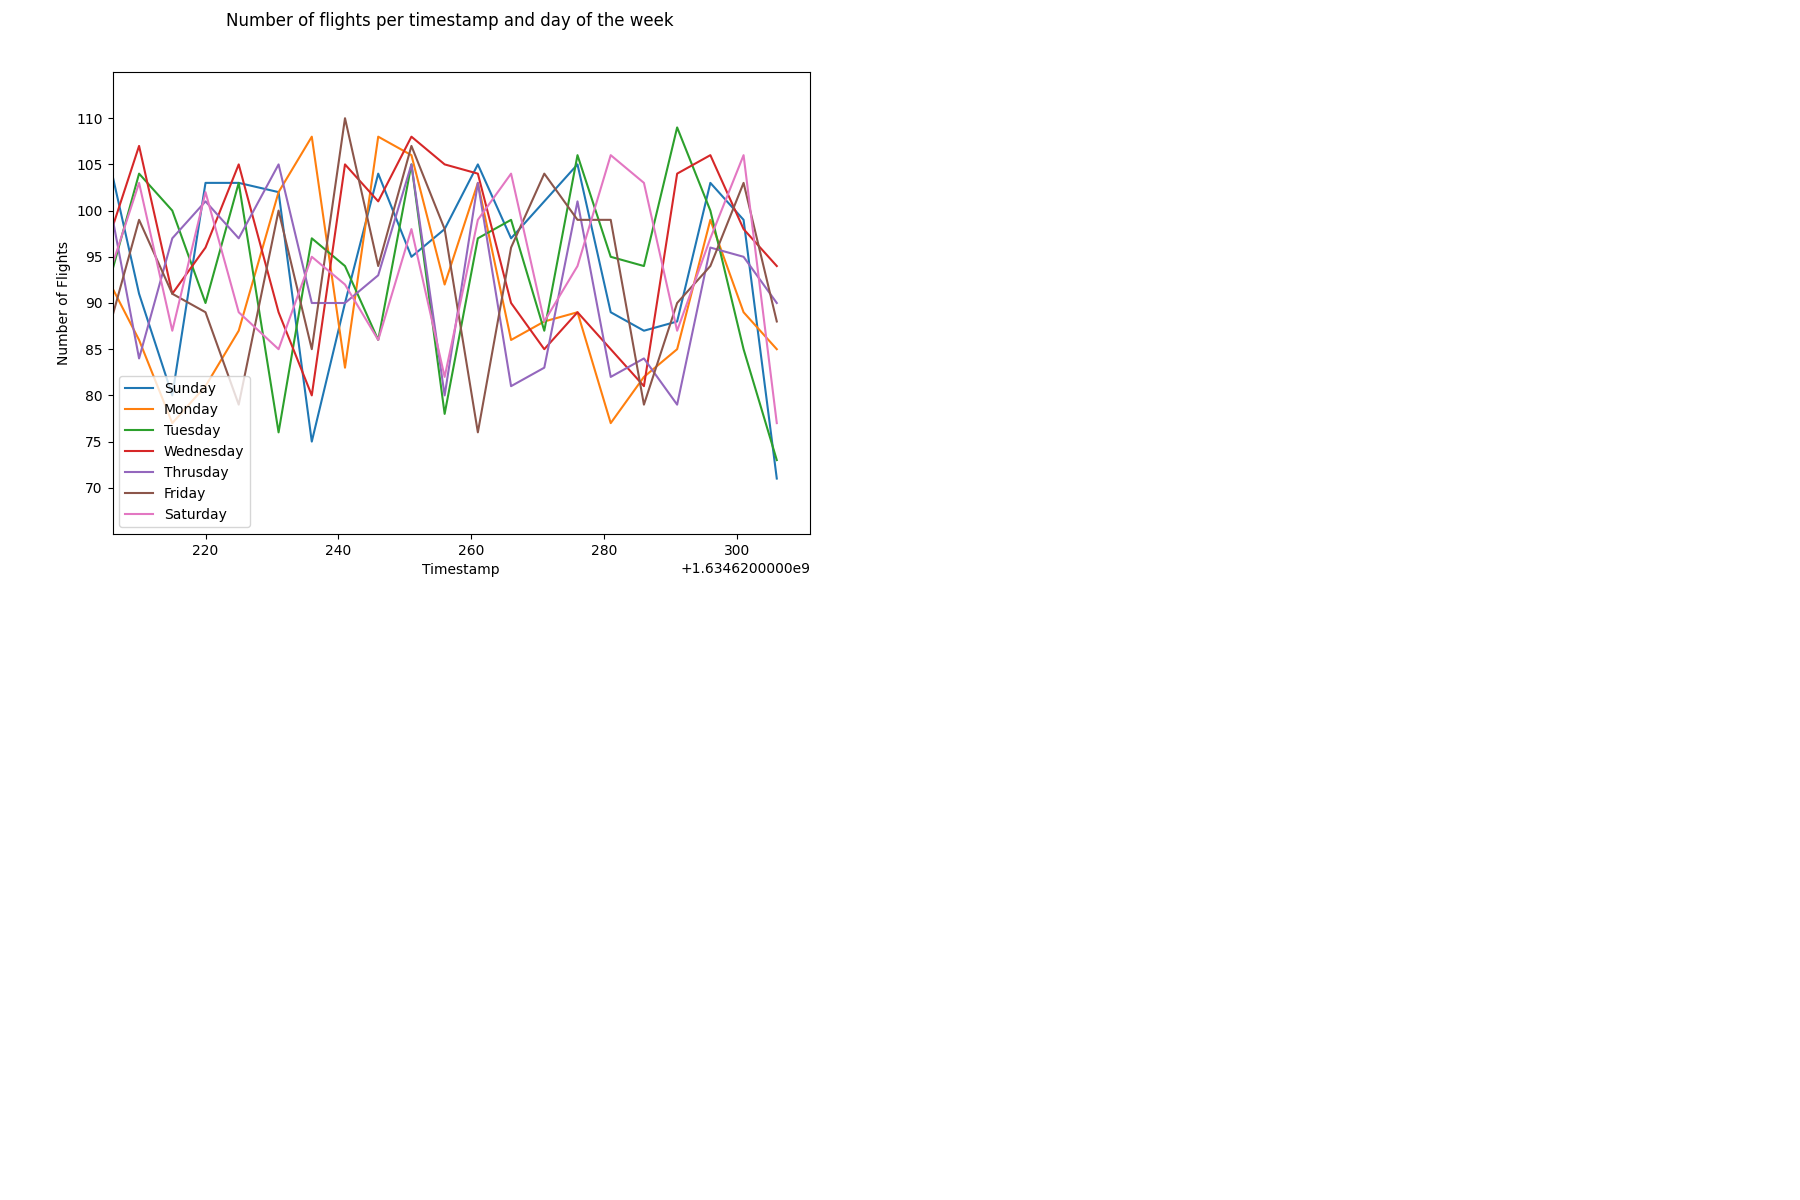

In [ ]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import collections
import json

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'flight_Topic'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Number of flights per timestamp and day of the week') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_ylim(65,115) 
        ax.set_yticks([70,75,80,85,90,95,100,105,110])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        data_list1,data_list2,data_list3,data_list4,data_list5,data_list6,data_list7 = [],[],[],[],[],[],[]
        x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7 = [],[],[],[],[],[],[],[],[],[],[],[],[],[]
        # print('Waiting for messages')
        for message in consumer:
            batch =  json.loads(str(message.value.decode('utf-8')))
            
            for record in batch:
                key = record['DAY_OF_WEEK']
                data = record['ts']  
                
                
                if key == 1:    
                    data_list1.append(data)
                    data_counter = collections.Counter(data_list1)
                    x1 = list(data_counter.keys())
                    y1 = list(data_counter.values())
                elif key == 2:   
                    data_list2.append(data)
                    data_counter = collections.Counter(data_list2)
                    x2 = list(data_counter.keys())
                    y2 = list(data_counter.values())
                elif key == 3:    
                    data_list3.append(data)
                    data_counter = collections.Counter(data_list3)
                    x3 = list(data_counter.keys())
                    y3 = list(data_counter.values())
                elif key == 4:    
                    data_list4.append(data)
                    data_counter = collections.Counter(data_list4)
                    x4 = list(data_counter.keys())
                    y4 = list(data_counter.values())
                elif key == 5:
                    data_list5.append(data)
                    data_counter = collections.Counter(data_list5)
                    x5 = list(data_counter.keys())
                    y5 = list(data_counter.values())
                elif key == 6:    
                    data_list6.append(data)
                    data_counter = collections.Counter(data_list6)
                    x6 = list(data_counter.keys())
                    y6 = list(data_counter.values())
                elif key == 7:    
                    data_list7.append(data)
                    data_counter = collections.Counter(data_list7)
                    x7 = list(data_counter.keys())
                    y7 = list(data_counter.values())
                    
            ax.clear()
            ax.plot(x1, y1, label="Sunday")
            ax.plot(x2, y2, label="Monday")
            ax.plot(x3, y3, label="Tuesday")
            ax.plot(x4, y4, label="Wednesday")
            ax.plot(x5, y5, label="Thrusday")
            ax.plot(x6, y6, label="Friday")
            ax.plot(x7, y7, label="Saturday")
            ax.legend()
            ax.set_xlabel('Timestamp')
            ax.set_ylabel('Number of Flights')
            ax.set_xlim(max(x1)-100,max(x1)+5) 
            ax.set_ylim(65,115)
            ax.set_yticks([70,75, 80, 85, 90, 95, 100, 105, 110])
            fig.canvas.draw()
                
        plt.close('all')
    except Exception as ex:
        print(str(ex))
        print()
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    
    
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)  
    

### References
https://www.codegrepper.com/code-examples/python/python+group+list+count                       
https://www.tutorialspoint.com/How-to-convert-string-to-JSON-using-Python